# Regression - FFNN - one_hot + normalize

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

In [57]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [60]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [63]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [64]:
scaler = StandardScaler()
scaler.fit(X[:,3:])

X_train_scaled = scaler.transform(X_train[:,3:])
X_test_scaled = scaler.transform(X_test[:,3:])

In [65]:
X_train_scaled = np.concatenate((X_train[:,:3], X_train_scaled), axis=1)
X_test_scaled = np.concatenate((X_test[:,:3], X_test_scaled), axis=1)

## Build Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [26]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [28]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 192us/sample - loss: 83.4325 - mae: 8.4574 - val_loss: 48.8903 - val_mae: 5.9600
Epoch 2/100
3341/3341 [==============================] - 0s 47us/sample - loss: 32.8104 - mae: 4.6206 - val_loss: 22.6109 - val_mae: 3.7460
Epoch 3/100
3341/3341 [==============================] - 0s 71us/sample - loss: 13.8085 - mae: 2.7275 - val_loss: 7.4541 - val_mae: 1.9654
Epoch 4/100
3341/3341 [==============================] - 0s 52us/sample - loss: 6.8978 - mae: 1.8350 - val_loss: 6.5149 - val_mae: 1.8333
Epoch 5/100
3341/3341 [==============================] - 0s 46us/sample - loss: 6.0945 - mae: 1.7606 - val_loss: 6.1157 - val_mae: 1.7453
Epoch 6/100
3341/3341 [==============================] - 0s 46us/sample - loss: 5.5813 - mae: 1.6785 - val_loss: 5.7151 - val_mae: 1.7100
Epoch 7/100
3341/3341 [==============================] - 0s 46us/sample - loss: 5.3296 - mae: 1.6454 - val_loss: 5.6127

In [32]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [33]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.543296066834196
RMSE :      2.131500895339759
r2_score :  0.5951314340395566


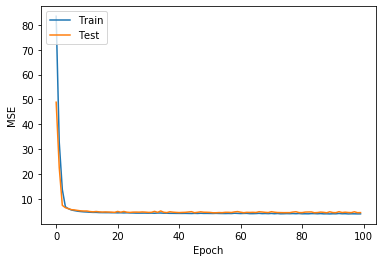

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 2

## Build Model

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [17]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 394us/sample - loss: 73.8664 - mae: 7.7463 - val_loss: 40.0410 - val_mae: 5.1978
Epoch 2/300
3341/3341 [==============================] - 0s 45us/sample - loss: 32.0088 - mae: 4.5077 - val_loss: 21.9355 - val_mae: 3.6341
Epoch 3/300
3341/3341 [==============================] - 0s 45us/sample - loss: 13.8017 - mae: 2.6553 - val_loss: 8.4242 - val_mae: 1.9698
Epoch 4/300
3341/3341 [==============================] - 0s 52us/sample - loss: 7.4529 - mae: 1.8996 - val_loss: 7.4492 - val_mae: 1.8762
Epoch 5/300
3341/3341 [==============================] - 0s 59us/sample - loss: 6.3285 - mae: 1.7656 - val_loss: 6.2821 - val_mae: 1.7731
Epoch 6/300
3341/3341 [==============================] - 0s 48us/sample - loss: 5.7350 - mae: 1.7033 - val_loss: 5.8443 - val_mae: 1.7130
Epoch 7/300
3341/3341 [==============================] - 0s 47us/sample - loss: 5.3784 - mae: 1.6662 - val_loss: 5.5364

Epoch 118/300
3341/3341 [==============================] - 0s 49us/sample - loss: 3.9493 - mae: 1.4032 - val_loss: 4.4415 - val_mae: 1.4770
Epoch 119/300
3341/3341 [==============================] - 0s 46us/sample - loss: 3.9908 - mae: 1.4208 - val_loss: 4.9575 - val_mae: 1.5260
Epoch 120/300
3341/3341 [==============================] - 0s 40us/sample - loss: 3.9090 - mae: 1.4109 - val_loss: 4.5607 - val_mae: 1.5044
Epoch 121/300
3341/3341 [==============================] - 0s 41us/sample - loss: 4.2190 - mae: 1.4756 - val_loss: 4.8670 - val_mae: 1.5096
Epoch 122/300
3341/3341 [==============================] - 0s 61us/sample - loss: 3.9247 - mae: 1.4123 - val_loss: 4.8564 - val_mae: 1.4977
Epoch 123/300
3341/3341 [==============================] - 0s 43us/sample - loss: 3.9580 - mae: 1.4205 - val_loss: 4.9705 - val_mae: 1.5064
Epoch 124/300
3341/3341 [==============================] - 0s 40us/sample - loss: 4.0056 - mae: 1.4184 - val_loss: 4.5014 - val_mae: 1.4898
Epoch 125/300
3341/3

3341/3341 [==============================] - 0s 54us/sample - loss: 3.7150 - mae: 1.3815 - val_loss: 4.7656 - val_mae: 1.5040
Epoch 235/300
3341/3341 [==============================] - 0s 45us/sample - loss: 3.6647 - mae: 1.3816 - val_loss: 4.7620 - val_mae: 1.5219
Epoch 236/300
3341/3341 [==============================] - 0s 55us/sample - loss: 3.7642 - mae: 1.4007 - val_loss: 5.4052 - val_mae: 1.5822
Epoch 237/300
3341/3341 [==============================] - 0s 42us/sample - loss: 3.8228 - mae: 1.4016 - val_loss: 4.9837 - val_mae: 1.5271
Epoch 238/300
3341/3341 [==============================] - 0s 49us/sample - loss: 3.7140 - mae: 1.3782 - val_loss: 5.1744 - val_mae: 1.5424
Epoch 239/300
3341/3341 [==============================] - 0s 49us/sample - loss: 3.6779 - mae: 1.3734 - val_loss: 4.8106 - val_mae: 1.5021
Epoch 240/300
3341/3341 [==============================] - 0s 47us/sample - loss: 3.6821 - mae: 1.3685 - val_loss: 4.6211 - val_mae: 1.5091
Epoch 241/300
3341/3341 [=========

In [18]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [19]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.694619298575841
RMSE :      2.1667070172443346
r2_score :  0.5816465061522947


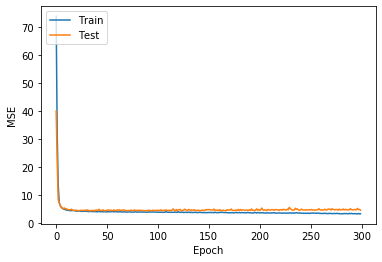

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3

## Build Model

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 44,065
Trainable params: 44,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 268us/sample - loss: 59.3244 - mae: 6.5757 - val_loss: 27.3539 - val_mae: 4.2477
Epoch 2/100
3341/3341 [==============================] - 0s 56us/sample - loss: 17.0876 - mae: 2.9683 - val_loss: 7.1345 - val_mae: 1.8740
Epoch 3/100
3341/3341 [==============================] - 0s 59us/sample - loss: 6.3318 - mae: 1.6971 - val_loss: 5.5320 - val_mae: 1.6539
Epoch 4/100
3341/3341 [==============================] - 0s 58us/sample - loss: 5.4740 - mae: 1.6188 - val_loss: 5.6746 - val_mae: 1.6398
Epoch 5/100
3341/3341 [==============================] - 0s 59us/sample - loss: 5.1694 - mae: 1.5827 - val_loss: 5.2363 - val_mae: 1.6150
Epoch 6/100
3341/3341 [==============================] - 0s 47us/sample - loss: 4.9131 - mae: 1.5707 - val_loss: 5.0916 - val_mae: 1.5806
Epoch 7/100
3341/3341 [==============================] - 0s 59us/sample - loss: 4.7779 - mae: 1.5479 - val_loss: 4.9296 -

In [26]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [27]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.844136308139286
RMSE :      2.200939869269328
r2_score :  0.5683225368669675


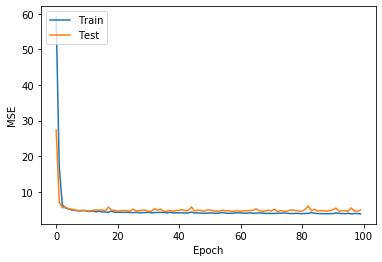

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 4

## Build Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [32]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 355us/sample - loss: 79.8005 - mae: 8.1396 - val_loss: 46.4868 - val_mae: 5.9130
Epoch 2/100
3341/3341 [==============================] - 0s 57us/sample - loss: 26.9599 - mae: 4.1592 - val_loss: 16.8861 - val_mae: 3.1598
Epoch 3/100
3341/3341 [==============================] - 0s 55us/sample - loss: 13.1494 - mae: 2.5776 - val_loss: 7.8637 - val_mae: 2.0106
Epoch 4/100
3341/3341 [==============================] - 0s 41us/sample - loss: 7.6025 - mae: 1.7953 - val_loss: 5.9655 - val_mae: 1.7892
Epoch 5/100
3341/3341 [==============================] - 0s 46us/sample - loss: 6.3255 - mae: 1.6913 - val_loss: 5.5193 - val_mae: 1.7106
Epoch 6/100
3341/3341 [==============================] - 0s 51us/sample - loss: 5.6887 - mae: 1.6222 - val_loss: 5.3795 - val_mae: 1.6484
Epoch 7/100
3341/3341 [==============================] - 0s 49us/sample - loss: 5.4805 - mae: 1.6034 - val_loss: 5.1250

In [33]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [34]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.455229213673677
RMSE :      2.110741389577055
r2_score :  0.6029793708729123


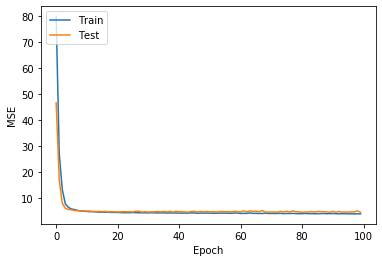

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 5

## Build Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(16, input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 320us/sample - loss: 89.8712 - mae: 8.8711 - val_loss: 58.8503 - val_mae: 6.8439
Epoch 2/100
3341/3341 [==============================] - 0s 60us/sample - loss: 34.6097 - mae: 4.6897 - val_loss: 20.5897 - val_mae: 3.6045
Epoch 3/100
3341/3341 [==============================] - 0s 73us/sample - loss: 13.8090 - mae: 2.6612 - val_loss: 7.5818 - val_mae: 1.9525
Epoch 4/100
3341/3341 [==============================] - 0s 71us/sample - loss: 6.7738 - mae: 1.7823 - val_loss: 6.0283 - val_mae: 1.7324
Epoch 5/100
3341/3341 [==============================] - 0s 74us/sample - loss: 5.9634 - mae: 1.6938 - val_loss: 5.7305 - val_mae: 1.7024
Epoch 6/100
3341/3341 [==============================] - 0s 61us/sample - loss: 5.6251 - mae: 1.6457 - val_loss: 5.5847 - val_mae: 1.6528
Epoch 7/100
3341/3341 [==============================] - 0s 56us/sample - loss: 5.4141 - mae: 1.6297 - val_loss: 5.5012

In [40]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [41]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.510925211961744
RMSE :      2.1238938796375266
r2_score :  0.5980161110225946


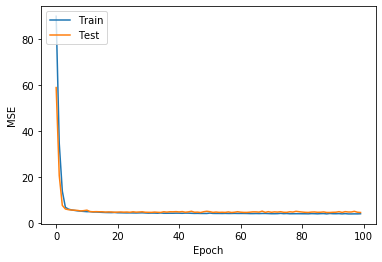

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 6

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


In [46]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 258us/sample - loss: 84.2678 - mae: 8.4558 - val_loss: 44.7855 - val_mae: 5.6630
Epoch 2/100
3341/3341 [==============================] - 0s 83us/sample - loss: 29.4285 - mae: 4.2823 - val_loss: 20.5700 - val_mae: 3.5059
Epoch 3/100
3341/3341 [==============================] - 0s 59us/sample - loss: 16.6617 - mae: 2.8717 - val_loss: 11.3743 - val_mae: 2.2943
Epoch 4/100
3341/3341 [==============================] - 0s 83us/sample - loss: 10.0794 - mae: 2.1368 - val_loss: 9.2481 - val_mae: 2.0263
Epoch 5/100
3341/3341 [==============================] - 0s 60us/sample - loss: 8.3724 - mae: 1.9770 - val_loss: 7.9975 - val_mae: 1.9244
Epoch 6/100
3341/3341 [==============================] - 0s 61us/sample - loss: 7.3705 - mae: 1.8914 - val_loss: 7.6285 - val_mae: 1.8703
Epoch 7/100
3341/3341 [==============================] - 0s 62us/sample - loss: 6.7883 - mae: 1.8272 - val_loss: 6.98

In [47]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [48]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.947099024093116
RMSE :      2.22420750472907
r2_score :  0.5591471790337136


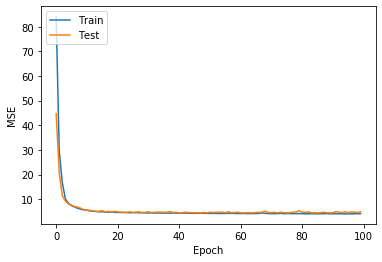

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 7

In [66]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [83]:
model = Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [84]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [85]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 129       
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [86]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 266us/sample - loss: 72.1285 - mae: 7.7363 - coeff: -6.3806 - val_loss: 45.8350 - val_mae: 5.7074 - val_coeff: -3.2501
Epoch 2/100
3341/3341 [==============================] - 0s 48us/sample - loss: 34.2507 - mae: 4.7613 - coeff: -2.4710 - val_loss: 27.8855 - val_mae: 4.2290 - val_coeff: -1.5466
Epoch 3/100
3341/3341 [==============================] - 0s 71us/sample - loss: 19.3837 - mae: 3.3936 - coeff: -0.9230 - val_loss: 11.4844 - val_mae: 2.4109 - val_coeff: -0.0398
Epoch 4/100
3341/3341 [==============================] - 0s 66us/sample - loss: 7.3873 - mae: 1.9467 - coeff: 0.2311 - val_loss: 7.0469 - val_mae: 1.9009 - val_coeff: 0.3622
Epoch 5/100
3341/3341 [==============================] - 0s 60us/sample - loss: 6.0784 - mae: 1.7861 - coeff: 0.3081 - val_loss: 6.2828 - val_mae: 1.7803 - val_coeff: 0.4295
Epoch 6/100
3341/3341 [==============================] - 0s 51us/sampl

3341/3341 [==============================] - 0s 56us/sample - loss: 4.2703 - mae: 1.4829 - coeff: 0.5745 - val_loss: 4.7023 - val_mae: 1.5152 - val_coeff: 0.5748
Epoch 48/100
3341/3341 [==============================] - 0s 69us/sample - loss: 4.2717 - mae: 1.4704 - coeff: 0.5760 - val_loss: 4.5618 - val_mae: 1.5116 - val_coeff: 0.5859
Epoch 49/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.3040 - mae: 1.4774 - coeff: 0.5612 - val_loss: 4.6245 - val_mae: 1.5111 - val_coeff: 0.5817
Epoch 50/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.2349 - mae: 1.4538 - coeff: 0.5807 - val_loss: 4.5475 - val_mae: 1.5059 - val_coeff: 0.5877
Epoch 51/100
3341/3341 [==============================] - 0s 76us/sample - loss: 4.2359 - mae: 1.4766 - coeff: 0.5755 - val_loss: 4.6369 - val_mae: 1.4994 - val_coeff: 0.5806
Epoch 52/100
3341/3341 [==============================] - 0s 79us/sample - loss: 4.2225 - mae: 1.4583 - coeff: 0.5865 - val_loss: 4.7922 -

Epoch 94/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.1509 - mae: 1.4412 - coeff: 0.5803 - val_loss: 4.6275 - val_mae: 1.5082 - val_coeff: 0.5812
Epoch 95/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.1018 - mae: 1.4354 - coeff: 0.5876 - val_loss: 4.6396 - val_mae: 1.4893 - val_coeff: 0.5812
Epoch 96/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1069 - mae: 1.4383 - coeff: 0.5838 - val_loss: 4.7661 - val_mae: 1.4925 - val_coeff: 0.5698
Epoch 97/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.0705 - mae: 1.4261 - coeff: 0.6014 - val_loss: 4.6042 - val_mae: 1.5189 - val_coeff: 0.5830
Epoch 98/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.1433 - mae: 1.4536 - coeff: 0.5846 - val_loss: 4.6979 - val_mae: 1.4848 - val_coeff: 0.5758
Epoch 99/100
3341/3341 [==============================] - 0s 59us/sample - loss: 4.1049 - mae: 1.4365 - coeff: 0.5775 - val_l

In [87]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [88]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.833212405332406
RMSE :      2.198456823622517
r2_score :  0.5692960030023575


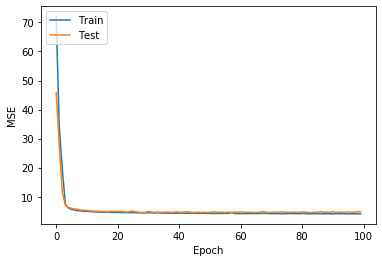

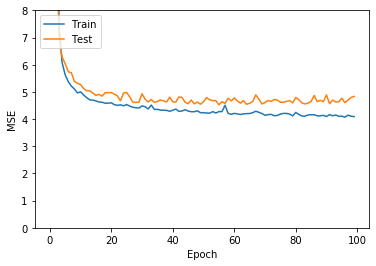

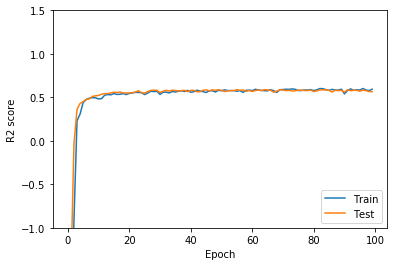

In [92]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 8

In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [94]:
model = Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [95]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [96]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_43 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 257       
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________


In [97]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 229us/sample - loss: 61.8743 - mae: 6.8558 - coeff: -5.2798 - val_loss: 32.1444 - val_mae: 4.5783 - val_coeff: -1.9101
Epoch 2/100
3341/3341 [==============================] - 0s 53us/sample - loss: 18.8879 - mae: 3.2317 - coeff: -0.8268 - val_loss: 7.5520 - val_mae: 2.0386 - val_coeff: 0.3158
Epoch 3/100
3341/3341 [==============================] - 0s 70us/sample - loss: 7.8411 - mae: 1.8998 - coeff: 0.2265 - val_loss: 6.4748 - val_mae: 1.8601 - val_coeff: 0.4111
Epoch 4/100
3341/3341 [==============================] - 0s 58us/sample - loss: 5.8142 - mae: 1.7014 - coeff: 0.4056 - val_loss: 5.7775 - val_mae: 1.6954 - val_coeff: 0.4771
Epoch 5/100
3341/3341 [==============================] - 0s 54us/sample - loss: 5.3384 - mae: 1.6420 - coeff: 0.4759 - val_loss: 5.3885 - val_mae: 1.6517 - val_coeff: 0.5122
Epoch 6/100
3341/3341 [==============================] - 0s 57us/sample - lo

3341/3341 [==============================] - 0s 62us/sample - loss: 4.1203 - mae: 1.4432 - coeff: 0.5766 - val_loss: 4.9505 - val_mae: 1.5190 - val_coeff: 0.5548
Epoch 48/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.1605 - mae: 1.4429 - coeff: 0.5758 - val_loss: 4.5953 - val_mae: 1.5253 - val_coeff: 0.5831
Epoch 49/100
3341/3341 [==============================] - 0s 57us/sample - loss: 4.1148 - mae: 1.4412 - coeff: 0.5870 - val_loss: 4.6322 - val_mae: 1.5039 - val_coeff: 0.5817
Epoch 50/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.2170 - mae: 1.4696 - coeff: 0.5866 - val_loss: 4.7273 - val_mae: 1.5115 - val_coeff: 0.5739
Epoch 51/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.2123 - mae: 1.4619 - coeff: 0.5718 - val_loss: 5.0260 - val_mae: 1.5314 - val_coeff: 0.5492
Epoch 52/100
3341/3341 [==============================] - 0s 59us/sample - loss: 4.1184 - mae: 1.4332 - coeff: 0.5830 - val_loss: 4.9583 -

Epoch 94/100
3341/3341 [==============================] - 0s 69us/sample - loss: 4.2034 - mae: 1.4709 - coeff: 0.5800 - val_loss: 4.8194 - val_mae: 1.5199 - val_coeff: 0.5676
Epoch 95/100
3341/3341 [==============================] - 0s 61us/sample - loss: 4.0402 - mae: 1.4550 - coeff: 0.6020 - val_loss: 5.1369 - val_mae: 1.5624 - val_coeff: 0.5370
Epoch 96/100
3341/3341 [==============================] - 0s 64us/sample - loss: 4.0507 - mae: 1.4401 - coeff: 0.6019 - val_loss: 4.5962 - val_mae: 1.5021 - val_coeff: 0.5858
Epoch 97/100
3341/3341 [==============================] - 0s 69us/sample - loss: 3.9818 - mae: 1.4324 - coeff: 0.6038 - val_loss: 4.6066 - val_mae: 1.4841 - val_coeff: 0.5864
Epoch 98/100
3341/3341 [==============================] - 0s 59us/sample - loss: 3.9201 - mae: 1.4112 - coeff: 0.6096 - val_loss: 4.5108 - val_mae: 1.4715 - val_coeff: 0.5938
Epoch 99/100
3341/3341 [==============================] - 0s 61us/sample - loss: 3.9856 - mae: 1.4277 - coeff: 0.6090 - val_l

In [98]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [99]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.579906527362215
RMSE :      2.1400716173441987
r2_score :  0.5918689513760707


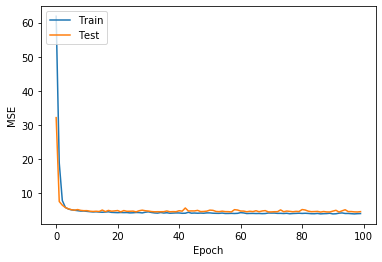

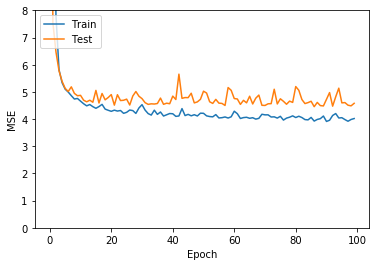

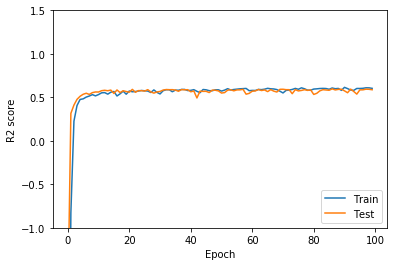

In [100]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 9

In [101]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [102]:
model = Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [103]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [104]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_48 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 513       
Total params: 174,145
Trainable params: 174,145
Non-trainable params: 0
_________________________________________________________________


In [105]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 307us/sample - loss: 40.5742 - mae: 4.9383 - coeff: -3.0096 - val_loss: 8.0808 - val_mae: 2.0702 - val_coeff: 0.2747
Epoch 2/100
3341/3341 [==============================] - 0s 58us/sample - loss: 7.6966 - mae: 1.9512 - coeff: 0.2492 - val_loss: 6.9001 - val_mae: 1.8101 - val_coeff: 0.3766
Epoch 3/100
3341/3341 [==============================] - 0s 59us/sample - loss: 5.5137 - mae: 1.6561 - coeff: 0.4421 - val_loss: 5.2397 - val_mae: 1.6128 - val_coeff: 0.5268
Epoch 4/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.8835 - mae: 1.5621 - coeff: 0.5082 - val_loss: 4.9289 - val_mae: 1.5611 - val_coeff: 0.5555
Epoch 5/100
3341/3341 [==============================] - 0s 65us/sample - loss: 4.6491 - mae: 1.5545 - coeff: 0.5222 - val_loss: 4.7345 - val_mae: 1.5485 - val_coeff: 0.5717
Epoch 6/100
3341/3341 [==============================] - 0s 71us/sample - loss: 

3341/3341 [==============================] - 0s 60us/sample - loss: 4.0161 - mae: 1.4513 - coeff: 0.5924 - val_loss: 4.5740 - val_mae: 1.4782 - val_coeff: 0.5886
Epoch 48/100
3341/3341 [==============================] - 0s 61us/sample - loss: 4.0652 - mae: 1.4362 - coeff: 0.5069 - val_loss: 5.1925 - val_mae: 1.6179 - val_coeff: 0.5346
Epoch 49/100
3341/3341 [==============================] - 0s 61us/sample - loss: 4.0937 - mae: 1.4637 - coeff: 0.5900 - val_loss: 5.1469 - val_mae: 1.5645 - val_coeff: 0.5395
Epoch 50/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.9148 - mae: 1.4163 - coeff: 0.6037 - val_loss: 4.4825 - val_mae: 1.4877 - val_coeff: 0.5952
Epoch 51/100
3341/3341 [==============================] - 0s 62us/sample - loss: 3.7889 - mae: 1.4000 - coeff: 0.6258 - val_loss: 4.7719 - val_mae: 1.4980 - val_coeff: 0.5705
Epoch 52/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1017 - mae: 1.4608 - coeff: 0.5872 - val_loss: 5.6703 -

Epoch 94/100
3341/3341 [==============================] - 0s 69us/sample - loss: 3.2662 - mae: 1.3087 - coeff: 0.6802 - val_loss: 4.6448 - val_mae: 1.5517 - val_coeff: 0.5791
Epoch 95/100
3341/3341 [==============================] - 0s 61us/sample - loss: 3.3199 - mae: 1.3172 - coeff: 0.6476 - val_loss: 5.5782 - val_mae: 1.5950 - val_coeff: 0.5048
Epoch 96/100
3341/3341 [==============================] - 0s 62us/sample - loss: 3.4691 - mae: 1.3524 - coeff: 0.6526 - val_loss: 5.0207 - val_mae: 1.5493 - val_coeff: 0.5513
Epoch 97/100
3341/3341 [==============================] - 0s 58us/sample - loss: 3.3140 - mae: 1.3282 - coeff: 0.6492 - val_loss: 5.0073 - val_mae: 1.5221 - val_coeff: 0.5563
Epoch 98/100
3341/3341 [==============================] - 0s 58us/sample - loss: 3.3192 - mae: 1.3222 - coeff: 0.6254 - val_loss: 4.8342 - val_mae: 1.5109 - val_coeff: 0.5696
Epoch 99/100
3341/3341 [==============================] - 0s 69us/sample - loss: 3.5235 - mae: 1.3620 - coeff: 0.6400 - val_l

In [106]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [107]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.843017482312826
RMSE :      2.200685684579428
r2_score :  0.5684222392419076


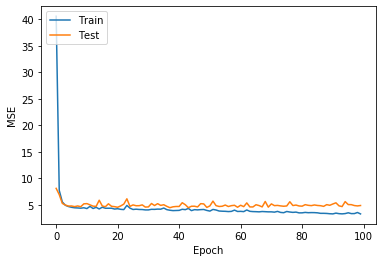

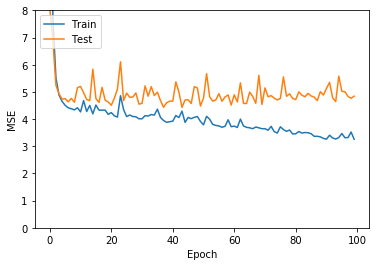

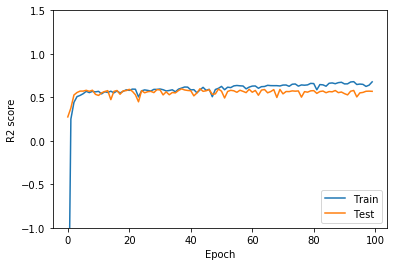

In [108]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 10

In [109]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [111]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [112]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_51 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_53 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_54 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 257       
Total params: 44,433
Trainable params: 44,433
Non-trainable params: 0
_________________________________________________

In [113]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 264us/sample - loss: 58.1994 - mae: 6.4996 - coeff: -4.7261 - val_loss: 23.4467 - val_mae: 3.8886 - val_coeff: -1.1454
Epoch 2/100
3341/3341 [==============================] - 0s 53us/sample - loss: 13.6553 - mae: 2.7182 - coeff: -0.3269 - val_loss: 6.6136 - val_mae: 1.8161 - val_coeff: 0.3989
Epoch 3/100
3341/3341 [==============================] - 0s 67us/sample - loss: 6.4328 - mae: 1.7460 - coeff: 0.3911 - val_loss: 5.8311 - val_mae: 1.6805 - val_coeff: 0.4732
Epoch 4/100
3341/3341 [==============================] - 0s 62us/sample - loss: 5.6163 - mae: 1.6648 - coeff: 0.4488 - val_loss: 6.4435 - val_mae: 1.7324 - val_coeff: 0.4187
Epoch 5/100
3341/3341 [==============================] - 0s 67us/sample - loss: 5.3459 - mae: 1.6346 - coeff: 0.4686 - val_loss: 5.2661 - val_mae: 1.6161 - val_coeff: 0.5239
Epoch 6/100
3341/3341 [==============================] - 0s 70us/sample - lo

3341/3341 [==============================] - 0s 66us/sample - loss: 4.3093 - mae: 1.4921 - coeff: 0.5637 - val_loss: 4.6225 - val_mae: 1.5612 - val_coeff: 0.5789
Epoch 48/100
3341/3341 [==============================] - 0s 55us/sample - loss: 4.2928 - mae: 1.4770 - coeff: 0.5725 - val_loss: 5.2288 - val_mae: 1.5671 - val_coeff: 0.5272
Epoch 49/100
3341/3341 [==============================] - 0s 61us/sample - loss: 4.1200 - mae: 1.4356 - coeff: 0.5969 - val_loss: 4.5536 - val_mae: 1.5154 - val_coeff: 0.5860
Epoch 50/100
3341/3341 [==============================] - 0s 63us/sample - loss: 4.0397 - mae: 1.4296 - coeff: 0.6005 - val_loss: 4.5818 - val_mae: 1.4969 - val_coeff: 0.5835
Epoch 51/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.0278 - mae: 1.4220 - coeff: 0.6081 - val_loss: 4.9397 - val_mae: 1.5298 - val_coeff: 0.5531
Epoch 52/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.1890 - mae: 1.4572 - coeff: 0.5798 - val_loss: 4.6099 -

Epoch 94/100
3341/3341 [==============================] - 0s 63us/sample - loss: 3.6906 - mae: 1.3872 - coeff: 0.6338 - val_loss: 4.9939 - val_mae: 1.5321 - val_coeff: 0.5488
Epoch 95/100
3341/3341 [==============================] - 0s 64us/sample - loss: 3.6477 - mae: 1.3734 - coeff: 0.6348 - val_loss: 5.0479 - val_mae: 1.5359 - val_coeff: 0.5451
Epoch 96/100
3341/3341 [==============================] - 0s 76us/sample - loss: 3.7104 - mae: 1.3770 - coeff: 0.6306 - val_loss: 4.9694 - val_mae: 1.6690 - val_coeff: 0.5415
Epoch 97/100
3341/3341 [==============================] - 0s 64us/sample - loss: 4.1920 - mae: 1.4967 - coeff: 0.5714 - val_loss: 5.2063 - val_mae: 1.5571 - val_coeff: 0.5301
Epoch 98/100
3341/3341 [==============================] - 0s 90us/sample - loss: 3.6921 - mae: 1.3738 - coeff: 0.6384 - val_loss: 4.7020 - val_mae: 1.5091 - val_coeff: 0.5741
Epoch 99/100
3341/3341 [==============================] - 0s 95us/sample - loss: 3.5953 - mae: 1.3648 - coeff: 0.6401 - val_l

In [114]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [115]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.032931721024344
RMSE :      2.2434196488896907
r2_score :  0.5514983354611489


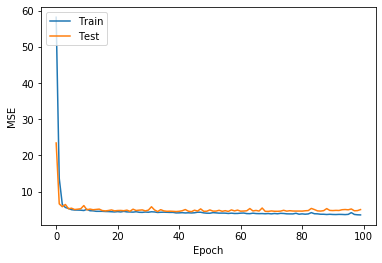

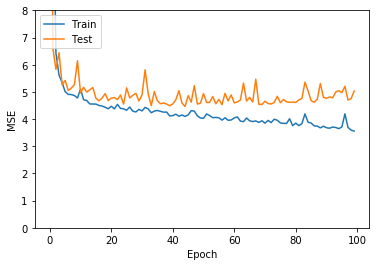

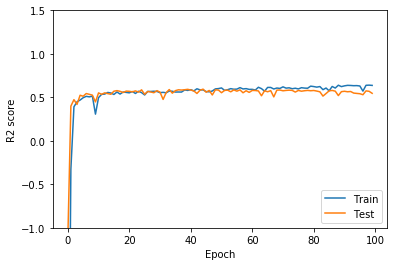

In [116]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 11

In [117]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [118]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [119]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [120]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_57 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_58 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_59 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 257       
Total params: 85,153
Trainable params: 85,153
Non-trainable params: 0
_________________________________________________________________


In [121]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 263us/sample - loss: 52.5302 - mae: 5.8354 - coeff: -4.1328 - val_loss: 16.4569 - val_mae: 3.0557 - val_coeff: -0.4995
Epoch 2/100
3341/3341 [==============================] - 0s 69us/sample - loss: 10.5330 - mae: 2.2554 - coeff: -0.0289 - val_loss: 7.9179 - val_mae: 1.9079 - val_coeff: 0.2856
Epoch 3/100
3341/3341 [==============================] - 0s 81us/sample - loss: 6.4668 - mae: 1.7656 - coeff: 0.3484 - val_loss: 5.7644 - val_mae: 1.7251 - val_coeff: 0.4793
Epoch 4/100
3341/3341 [==============================] - 0s 96us/sample - loss: 5.5694 - mae: 1.6679 - coeff: 0.4529 - val_loss: 6.0091 - val_mae: 1.6737 - val_coeff: 0.4582
Epoch 5/100
3341/3341 [==============================] - 0s 87us/sample - loss: 5.1290 - mae: 1.6014 - coeff: 0.4991 - val_loss: 5.2084 - val_mae: 1.5796 - val_coeff: 0.5312
Epoch 6/100
3341/3341 [==============================] - 0s 73us/sample - lo

3341/3341 [==============================] - 0s 61us/sample - loss: 3.9512 - mae: 1.4205 - coeff: 0.6113 - val_loss: 4.8306 - val_mae: 1.5007 - val_coeff: 0.5664
Epoch 48/100
3341/3341 [==============================] - 0s 66us/sample - loss: 3.9611 - mae: 1.4170 - coeff: 0.6086 - val_loss: 4.4636 - val_mae: 1.5187 - val_coeff: 0.5949
Epoch 49/100
3341/3341 [==============================] - 0s 61us/sample - loss: 3.9177 - mae: 1.4213 - coeff: 0.5998 - val_loss: 5.2919 - val_mae: 1.5677 - val_coeff: 0.5246
Epoch 50/100
3341/3341 [==============================] - 0s 60us/sample - loss: 3.9948 - mae: 1.4304 - coeff: 0.5992 - val_loss: 4.4466 - val_mae: 1.4860 - val_coeff: 0.5990
Epoch 51/100
3341/3341 [==============================] - 0s 71us/sample - loss: 3.9525 - mae: 1.4238 - coeff: 0.5987 - val_loss: 5.1645 - val_mae: 1.5599 - val_coeff: 0.5375
Epoch 52/100
3341/3341 [==============================] - 0s 63us/sample - loss: 3.9706 - mae: 1.4261 - coeff: 0.5998 - val_loss: 4.9512 -

Epoch 94/100
3341/3341 [==============================] - 0s 79us/sample - loss: 3.6716 - mae: 1.3832 - coeff: 0.6369 - val_loss: 4.6292 - val_mae: 1.5267 - val_coeff: 0.5829
Epoch 95/100
3341/3341 [==============================] - 0s 76us/sample - loss: 3.6006 - mae: 1.3722 - coeff: 0.6401 - val_loss: 4.6502 - val_mae: 1.4999 - val_coeff: 0.5832
Epoch 96/100
3341/3341 [==============================] - 0s 56us/sample - loss: 3.5774 - mae: 1.3622 - coeff: 0.6224 - val_loss: 5.0938 - val_mae: 1.5368 - val_coeff: 0.5464
Epoch 97/100
3341/3341 [==============================] - 0s 69us/sample - loss: 3.5426 - mae: 1.3517 - coeff: 0.6458 - val_loss: 4.6840 - val_mae: 1.5689 - val_coeff: 0.5769
Epoch 98/100
3341/3341 [==============================] - 0s 64us/sample - loss: 3.4896 - mae: 1.3514 - coeff: 0.6529 - val_loss: 4.7802 - val_mae: 1.5012 - val_coeff: 0.5720
Epoch 99/100
3341/3341 [==============================] - 0s 73us/sample - loss: 3.4478 - mae: 1.3267 - coeff: 0.6625 - val_l

In [122]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [123]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.933686133764666
RMSE :      2.2211902515913997
r2_score :  0.5603424473131257


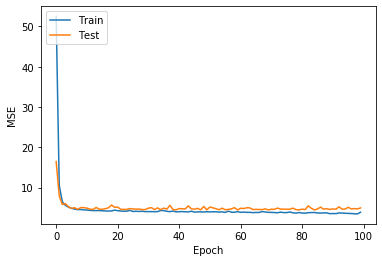

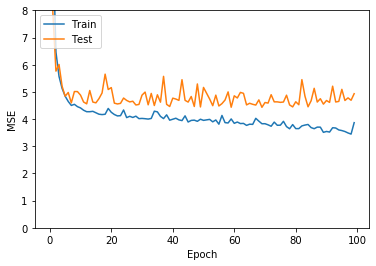

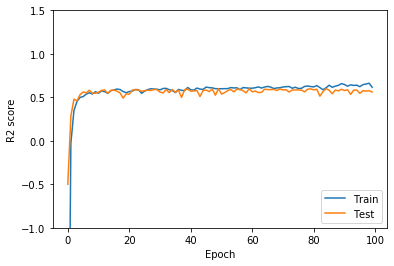

In [124]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 12

In [125]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [126]:
model = Sequential()
model.add(Dense(16, input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [127]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [128]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_62 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_63 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [129]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 370us/sample - loss: 88.4054 - mae: 8.7871 - coeff: -7.9647 - val_loss: 66.0369 - val_mae: 7.3036 - val_coeff: -5.1423
Epoch 2/100
3341/3341 [==============================] - 0s 75us/sample - loss: 43.9752 - mae: 5.6231 - coeff: -4.0107 - val_loss: 31.4317 - val_mae: 4.5955 - val_coeff: -1.8578
Epoch 3/100
3341/3341 [==============================] - 0s 86us/sample - loss: 27.0906 - mae: 4.1534 - coeff: -1.8020 - val_loss: 20.9882 - val_mae: 3.6406 - val_coeff: -0.8983
Epoch 4/100
3341/3341 [==============================] - 0s 59us/sample - loss: 15.8594 - mae: 2.9930 - coeff: -0.5594 - val_loss: 10.4510 - val_mae: 2.3752 - val_coeff: 0.0713
Epoch 5/100
3341/3341 [==============================] - 0s 56us/sample - loss: 8.9867 - mae: 2.0497 - coeff: 0.1280 - val_loss: 6.7949 - val_mae: 1.8087 - val_coeff: 0.3986
Epoch 6/100
3341/3341 [==============================] - 0s 68us/sa

3341/3341 [==============================] - 0s 84us/sample - loss: 4.2953 - mae: 1.4776 - coeff: 0.5744 - val_loss: 4.7602 - val_mae: 1.5357 - val_coeff: 0.5697
Epoch 48/100
3341/3341 [==============================] - 0s 69us/sample - loss: 4.3064 - mae: 1.4852 - coeff: 0.5755 - val_loss: 4.7715 - val_mae: 1.5114 - val_coeff: 0.5690
Epoch 49/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.3167 - mae: 1.4802 - coeff: 0.5730 - val_loss: 4.6710 - val_mae: 1.5537 - val_coeff: 0.5768
Epoch 50/100
3341/3341 [==============================] - 0s 71us/sample - loss: 4.3410 - mae: 1.5035 - coeff: 0.5678 - val_loss: 4.7179 - val_mae: 1.5207 - val_coeff: 0.5730
Epoch 51/100
3341/3341 [==============================] - 0s 70us/sample - loss: 4.2981 - mae: 1.4799 - coeff: 0.5816 - val_loss: 4.5859 - val_mae: 1.5137 - val_coeff: 0.5843
Epoch 52/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.2847 - mae: 1.4829 - coeff: 0.5671 - val_loss: 4.5547 -

Epoch 94/100
3341/3341 [==============================] - 0s 72us/sample - loss: 4.1220 - mae: 1.4393 - coeff: 0.5844 - val_loss: 4.6015 - val_mae: 1.5033 - val_coeff: 0.5827
Epoch 95/100
3341/3341 [==============================] - 0s 71us/sample - loss: 4.1624 - mae: 1.4467 - coeff: 0.5881 - val_loss: 4.7266 - val_mae: 1.5004 - val_coeff: 0.5722
Epoch 96/100
3341/3341 [==============================] - 0s 65us/sample - loss: 4.1182 - mae: 1.4384 - coeff: 0.5829 - val_loss: 4.7115 - val_mae: 1.5001 - val_coeff: 0.5739
Epoch 97/100
3341/3341 [==============================] - 0s 65us/sample - loss: 4.0919 - mae: 1.4337 - coeff: 0.5949 - val_loss: 4.5885 - val_mae: 1.5055 - val_coeff: 0.5841
Epoch 98/100
3341/3341 [==============================] - 0s 63us/sample - loss: 4.1461 - mae: 1.4514 - coeff: 0.5961 - val_loss: 4.6003 - val_mae: 1.5018 - val_coeff: 0.5831
Epoch 99/100
3341/3341 [==============================] - 0s 70us/sample - loss: 4.1059 - mae: 1.4450 - coeff: 0.5811 - val_l

In [130]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [131]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.547911060694341
RMSE :      2.13258318963044
r2_score :  0.5947201762393632


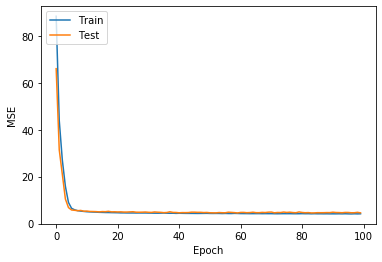

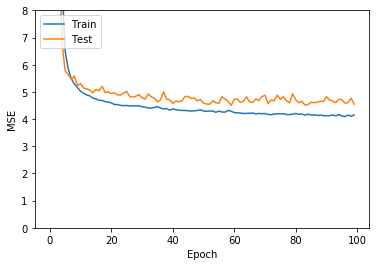

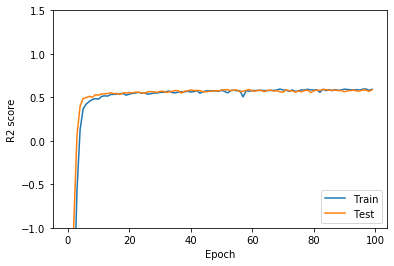

In [132]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 13

In [133]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [134]:
model = Sequential()
model.add(Dense(8, input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [135]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [136]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_66 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_67 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 33        
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


In [137]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 303us/sample - loss: 102.4185 - mae: 9.5992 - coeff: -9.3553 - val_loss: 98.9541 - val_mae: 9.3452 - val_coeff: -8.1968
Epoch 2/100
3341/3341 [==============================] - 0s 83us/sample - loss: 84.5783 - mae: 8.5573 - coeff: -7.7608 - val_loss: 73.4223 - val_mae: 7.7953 - val_coeff: -5.8197
Epoch 3/100
3341/3341 [==============================] - 0s 67us/sample - loss: 53.2290 - mae: 6.4111 - coeff: -4.4121 - val_loss: 37.5370 - val_mae: 5.1196 - val_coeff: -2.4758
Epoch 4/100
3341/3341 [==============================] - 0s 71us/sample - loss: 27.7053 - mae: 4.2356 - coeff: -1.8500 - val_loss: 23.2431 - val_mae: 3.8346 - val_coeff: -1.1290
Epoch 5/100
3341/3341 [==============================] - 0s 53us/sample - loss: 19.2915 - mae: 3.4104 - coeff: -0.9015 - val_loss: 15.9374 - val_mae: 3.0328 - val_coeff: -0.4572
Epoch 6/100
3341/3341 [==============================] - 0s 5

3341/3341 [==============================] - 0s 77us/sample - loss: 4.6278 - mae: 1.5270 - coeff: 0.5415 - val_loss: 4.8330 - val_mae: 1.5490 - val_coeff: 0.5656
Epoch 48/100
3341/3341 [==============================] - 0s 57us/sample - loss: 4.6094 - mae: 1.5350 - coeff: 0.5395 - val_loss: 4.8073 - val_mae: 1.5471 - val_coeff: 0.5678
Epoch 49/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.6047 - mae: 1.5320 - coeff: 0.5317 - val_loss: 4.7827 - val_mae: 1.5471 - val_coeff: 0.5698
Epoch 50/100
3341/3341 [==============================] - 0s 66us/sample - loss: 4.5990 - mae: 1.5349 - coeff: 0.5455 - val_loss: 4.7255 - val_mae: 1.5450 - val_coeff: 0.5744
Epoch 51/100
3341/3341 [==============================] - 0s 58us/sample - loss: 4.5992 - mae: 1.5292 - coeff: 0.5430 - val_loss: 4.7366 - val_mae: 1.5413 - val_coeff: 0.5740
Epoch 52/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.5786 - mae: 1.5311 - coeff: 0.5333 - val_loss: 4.7879 -

Epoch 94/100
3341/3341 [==============================] - 0s 68us/sample - loss: 4.3291 - mae: 1.4779 - coeff: 0.5674 - val_loss: 4.5636 - val_mae: 1.5268 - val_coeff: 0.5871
Epoch 95/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.3826 - mae: 1.4919 - coeff: 0.5612 - val_loss: 4.5127 - val_mae: 1.5290 - val_coeff: 0.5916
Epoch 96/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.3687 - mae: 1.5009 - coeff: 0.5665 - val_loss: 4.5834 - val_mae: 1.5157 - val_coeff: 0.5864
Epoch 97/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.3176 - mae: 1.4813 - coeff: 0.5719 - val_loss: 4.5270 - val_mae: 1.5228 - val_coeff: 0.5907
Epoch 98/100
3341/3341 [==============================] - 0s 61us/sample - loss: 4.3261 - mae: 1.4876 - coeff: 0.5738 - val_loss: 4.6006 - val_mae: 1.5182 - val_coeff: 0.5846
Epoch 99/100
3341/3341 [==============================] - 0s 76us/sample - loss: 4.3042 - mae: 1.4757 - coeff: 0.5721 - val_l

In [138]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [139]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.575945990667862
RMSE :      2.1391460891364718
r2_score :  0.5922218882721673


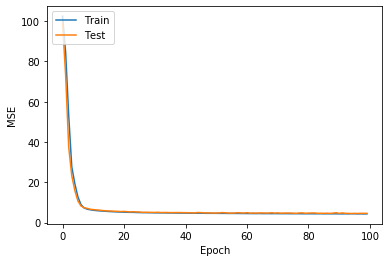

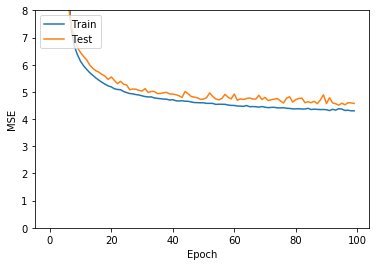

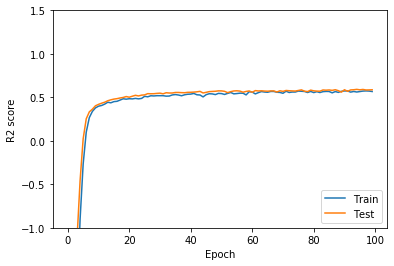

In [140]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 14 - 16 32 64 - 200

In [156]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [157]:
model = Sequential()
model.add(Dense(16, input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [158]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [159]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_78 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [160]:
epochs = 200
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/200
3341/3341 [==============================] - 1s 309us/sample - loss: 104.3078 - mae: 9.6976 - coeff: -9.5489 - val_loss: 94.8037 - val_mae: 9.1264 - val_coeff: -7.8163
Epoch 2/200
3341/3341 [==============================] - 0s 93us/sample - loss: 71.0589 - mae: 7.6897 - coeff: -6.1611 - val_loss: 46.3422 - val_mae: 5.9036 - val_coeff: -3.3045
Epoch 3/200
3341/3341 [==============================] - 0s 74us/sample - loss: 30.4355 - mae: 4.4724 - coeff: -2.0475 - val_loss: 21.7672 - val_mae: 3.7663 - val_coeff: -0.9881
Epoch 4/200
3341/3341 [==============================] - 0s 83us/sample - loss: 16.7525 - mae: 3.0334 - coeff: -0.6187 - val_loss: 10.6720 - val_mae: 2.4266 - val_coeff: 0.0277
Epoch 5/200
3341/3341 [==============================] - 0s 78us/sample - loss: 9.5857 - mae: 2.0667 - coeff: 0.0807 - val_loss: 7.0850 - val_mae: 1.8718 - val_coeff: 0.3586
Epoch 6/200
3341/3341 [==============================] - 0s 77us/s

3341/3341 [==============================] - 0s 56us/sample - loss: 4.2384 - mae: 1.4570 - coeff: 0.5745 - val_loss: 4.5827 - val_mae: 1.4856 - val_coeff: 0.5850
Epoch 48/200
3341/3341 [==============================] - 0s 57us/sample - loss: 4.2438 - mae: 1.4526 - coeff: 0.5871 - val_loss: 4.5528 - val_mae: 1.4884 - val_coeff: 0.5879
Epoch 49/200
3341/3341 [==============================] - 0s 50us/sample - loss: 4.2055 - mae: 1.4565 - coeff: 0.5890 - val_loss: 4.5554 - val_mae: 1.4835 - val_coeff: 0.5878
Epoch 50/200
3341/3341 [==============================] - 0s 62us/sample - loss: 4.2152 - mae: 1.4575 - coeff: 0.5875 - val_loss: 4.6471 - val_mae: 1.4833 - val_coeff: 0.5801
Epoch 51/200
3341/3341 [==============================] - 0s 76us/sample - loss: 4.2233 - mae: 1.4538 - coeff: 0.5906 - val_loss: 4.5581 - val_mae: 1.4817 - val_coeff: 0.5874
Epoch 52/200
3341/3341 [==============================] - 0s 79us/sample - loss: 4.1953 - mae: 1.4496 - coeff: 0.5606 - val_loss: 4.6957 -

Epoch 94/200
3341/3341 [==============================] - 0s 54us/sample - loss: 4.0648 - mae: 1.4303 - coeff: 0.5962 - val_loss: 4.8634 - val_mae: 1.5014 - val_coeff: 0.5607
Epoch 95/200
3341/3341 [==============================] - 0s 69us/sample - loss: 4.1366 - mae: 1.4374 - coeff: 0.5961 - val_loss: 4.5156 - val_mae: 1.5305 - val_coeff: 0.5894
Epoch 96/200
3341/3341 [==============================] - 0s 62us/sample - loss: 4.1236 - mae: 1.4469 - coeff: 0.5905 - val_loss: 4.5732 - val_mae: 1.4793 - val_coeff: 0.5857
Epoch 97/200
3341/3341 [==============================] - 0s 71us/sample - loss: 4.0728 - mae: 1.4285 - coeff: 0.5969 - val_loss: 4.5296 - val_mae: 1.4818 - val_coeff: 0.5896
Epoch 98/200
3341/3341 [==============================] - 0s 57us/sample - loss: 4.0860 - mae: 1.4358 - coeff: 0.5919 - val_loss: 4.4855 - val_mae: 1.4815 - val_coeff: 0.5932
Epoch 99/200
3341/3341 [==============================] - 0s 75us/sample - loss: 4.0832 - mae: 1.4309 - coeff: 0.5924 - val_l

3341/3341 [==============================] - 0s 56us/sample - loss: 4.0201 - mae: 1.4177 - coeff: 0.5949 - val_loss: 4.7109 - val_mae: 1.4845 - val_coeff: 0.5749
Epoch 141/200
3341/3341 [==============================] - 0s 50us/sample - loss: 4.0599 - mae: 1.4282 - coeff: 0.5768 - val_loss: 4.5920 - val_mae: 1.4772 - val_coeff: 0.5849
Epoch 142/200
3341/3341 [==============================] - 0s 63us/sample - loss: 4.0491 - mae: 1.4319 - coeff: 0.6012 - val_loss: 4.8284 - val_mae: 1.4979 - val_coeff: 0.5642
Epoch 143/200
3341/3341 [==============================] - 0s 70us/sample - loss: 4.0769 - mae: 1.4269 - coeff: 0.5996 - val_loss: 4.4886 - val_mae: 1.4853 - val_coeff: 0.5933
Epoch 144/200
3341/3341 [==============================] - 0s 55us/sample - loss: 4.0344 - mae: 1.4318 - coeff: 0.5922 - val_loss: 4.6831 - val_mae: 1.4879 - val_coeff: 0.5769
Epoch 145/200
3341/3341 [==============================] - 0s 66us/sample - loss: 4.0051 - mae: 1.4141 - coeff: 0.5545 - val_loss: 4.5

3341/3341 [==============================] - 0s 55us/sample - loss: 3.9883 - mae: 1.4123 - coeff: 0.5992 - val_loss: 4.6006 - val_mae: 1.4816 - val_coeff: 0.5850
Epoch 187/200
3341/3341 [==============================] - 0s 74us/sample - loss: 3.9582 - mae: 1.4146 - coeff: 0.6092 - val_loss: 4.7296 - val_mae: 1.4823 - val_coeff: 0.5734
Epoch 188/200
3341/3341 [==============================] - 0s 82us/sample - loss: 3.9666 - mae: 1.4080 - coeff: 0.5860 - val_loss: 4.5036 - val_mae: 1.4742 - val_coeff: 0.5922
Epoch 189/200
3341/3341 [==============================] - 0s 58us/sample - loss: 3.9575 - mae: 1.4139 - coeff: 0.5913 - val_loss: 4.6389 - val_mae: 1.4728 - val_coeff: 0.5806
Epoch 190/200
3341/3341 [==============================] - 0s 80us/sample - loss: 3.9701 - mae: 1.4145 - coeff: 0.5957 - val_loss: 4.7136 - val_mae: 1.4968 - val_coeff: 0.5741
Epoch 191/200
3341/3341 [==============================] - 0s 67us/sample - loss: 4.0426 - mae: 1.4387 - coeff: 0.6065 - val_loss: 4.7

In [161]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [162]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.508806316577879
RMSE :      2.123394997775468
r2_score :  0.5982049329974044


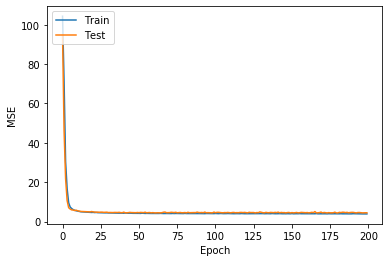

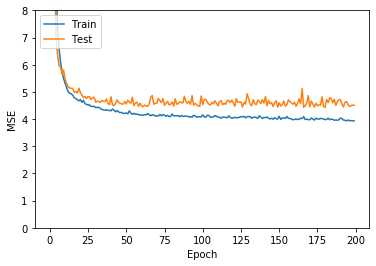

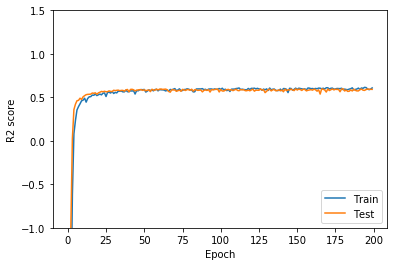

In [163]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 15 - 8 16 32 - 200

In [164]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [165]:
model = Sequential()
model.add(Dense(8, input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [166]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [167]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_82 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_83 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 33        
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


In [168]:
epochs = 200
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/200
3341/3341 [==============================] - 1s 218us/sample - loss: 108.2000 - mae: 9.9242 - coeff: -10.1953 - val_loss: 105.0748 - val_mae: 9.7004 - val_coeff: -8.7725
Epoch 2/200
3341/3341 [==============================] - 0s 54us/sample - loss: 91.7625 - mae: 9.0345 - coeff: -8.2049 - val_loss: 84.3028 - val_mae: 8.5644 - val_coeff: -6.8389
Epoch 3/200
3341/3341 [==============================] - 0s 59us/sample - loss: 65.4511 - mae: 7.3799 - coeff: -5.5136 - val_loss: 51.4936 - val_mae: 6.2820 - val_coeff: -3.7755
Epoch 4/200
3341/3341 [==============================] - 0s 52us/sample - loss: 38.0389 - mae: 5.1259 - coeff: -2.8215 - val_loss: 32.6513 - val_mae: 4.6901 - val_coeff: -1.9828
Epoch 5/200
3341/3341 [==============================] - 0s 57us/sample - loss: 28.8979 - mae: 4.3202 - coeff: -1.8514 - val_loss: 25.7831 - val_mae: 4.1245 - val_coeff: -1.3509
Epoch 6/200
3341/3341 [==============================] - 0s

3341/3341 [==============================] - 0s 48us/sample - loss: 4.6231 - mae: 1.5424 - coeff: 0.5478 - val_loss: 4.9437 - val_mae: 1.5553 - val_coeff: 0.5548
Epoch 48/200
3341/3341 [==============================] - 0s 40us/sample - loss: 4.6172 - mae: 1.5456 - coeff: 0.5271 - val_loss: 4.9553 - val_mae: 1.5561 - val_coeff: 0.5538
Epoch 49/200
3341/3341 [==============================] - 0s 45us/sample - loss: 4.6140 - mae: 1.5383 - coeff: 0.5427 - val_loss: 4.8522 - val_mae: 1.5535 - val_coeff: 0.5624
Epoch 50/200
3341/3341 [==============================] - 0s 52us/sample - loss: 4.6169 - mae: 1.5499 - coeff: 0.5270 - val_loss: 4.9240 - val_mae: 1.5521 - val_coeff: 0.5566
Epoch 51/200
3341/3341 [==============================] - 0s 43us/sample - loss: 4.6259 - mae: 1.5445 - coeff: 0.5366 - val_loss: 4.8972 - val_mae: 1.5521 - val_coeff: 0.5590
Epoch 52/200
3341/3341 [==============================] - 0s 45us/sample - loss: 4.5994 - mae: 1.5333 - coeff: 0.5467 - val_loss: 4.8776 -

3341/3341 [==============================] - 0s 41us/sample - loss: 4.4211 - mae: 1.5076 - coeff: 0.5623 - val_loss: 4.7005 - val_mae: 1.5272 - val_coeff: 0.5757
Epoch 94/200
3341/3341 [==============================] - 0s 45us/sample - loss: 4.4238 - mae: 1.5142 - coeff: 0.5597 - val_loss: 4.8453 - val_mae: 1.5344 - val_coeff: 0.5632
Epoch 95/200
3341/3341 [==============================] - 0s 68us/sample - loss: 4.4404 - mae: 1.5138 - coeff: 0.5535 - val_loss: 4.6845 - val_mae: 1.5257 - val_coeff: 0.5770
Epoch 96/200
3341/3341 [==============================] - 0s 79us/sample - loss: 4.4136 - mae: 1.5055 - coeff: 0.5640 - val_loss: 4.7235 - val_mae: 1.5293 - val_coeff: 0.5737
Epoch 97/200
3341/3341 [==============================] - 0s 73us/sample - loss: 4.4100 - mae: 1.5121 - coeff: 0.5627 - val_loss: 4.7834 - val_mae: 1.5309 - val_coeff: 0.5685
Epoch 98/200
3341/3341 [==============================] - 0s 69us/sample - loss: 4.4145 - mae: 1.5004 - coeff: 0.5589 - val_loss: 4.6334 -

Epoch 140/200
3341/3341 [==============================] - 0s 63us/sample - loss: 4.3037 - mae: 1.4785 - coeff: 0.5575 - val_loss: 4.6674 - val_mae: 1.5107 - val_coeff: 0.5791
Epoch 141/200
3341/3341 [==============================] - 0s 86us/sample - loss: 4.3014 - mae: 1.4730 - coeff: 0.5588 - val_loss: 4.5957 - val_mae: 1.5097 - val_coeff: 0.5854
Epoch 142/200
3341/3341 [==============================] - 0s 64us/sample - loss: 4.2852 - mae: 1.4759 - coeff: 0.5663 - val_loss: 4.6771 - val_mae: 1.5203 - val_coeff: 0.5783
Epoch 143/200
3341/3341 [==============================] - 0s 83us/sample - loss: 4.2939 - mae: 1.4731 - coeff: 0.5511 - val_loss: 4.6625 - val_mae: 1.5153 - val_coeff: 0.5796
Epoch 144/200
3341/3341 [==============================] - ETA: 0s - loss: 4.3250 - mae: 1.4922 - coeff: 0.568 - 0s 69us/sample - loss: 4.3140 - mae: 1.4902 - coeff: 0.5728 - val_loss: 4.7564 - val_mae: 1.5408 - val_coeff: 0.5711
Epoch 145/200
3341/3341 [==============================] - 0s 73us

3341/3341 [==============================] - 0s 60us/sample - loss: 4.1908 - mae: 1.4526 - coeff: 0.5382 - val_loss: 4.6022 - val_mae: 1.4970 - val_coeff: 0.5853
Epoch 187/200
3341/3341 [==============================] - 0s 55us/sample - loss: 4.1781 - mae: 1.4475 - coeff: 0.5523 - val_loss: 4.7201 - val_mae: 1.5315 - val_coeff: 0.5748
Epoch 188/200
3341/3341 [==============================] - 0s 59us/sample - loss: 4.2377 - mae: 1.4643 - coeff: 0.5803 - val_loss: 4.5877 - val_mae: 1.5035 - val_coeff: 0.5870
Epoch 189/200
3341/3341 [==============================] - 0s 58us/sample - loss: 4.2293 - mae: 1.4586 - coeff: 0.5815 - val_loss: 4.5495 - val_mae: 1.5433 - val_coeff: 0.5889
Epoch 190/200
3341/3341 [==============================] - 0s 60us/sample - loss: 4.2308 - mae: 1.4681 - coeff: 0.5830 - val_loss: 4.5505 - val_mae: 1.5066 - val_coeff: 0.5895
Epoch 191/200
3341/3341 [==============================] - 0s 57us/sample - loss: 4.2019 - mae: 1.4555 - coeff: 0.5815 - val_loss: 4.4

In [169]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [170]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.513817327688111
RMSE :      2.124574622762898
r2_score :  0.5977583847530534


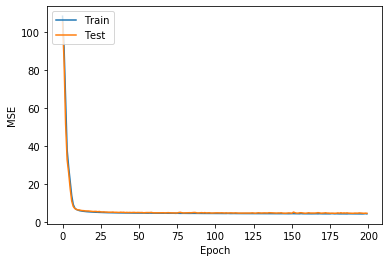

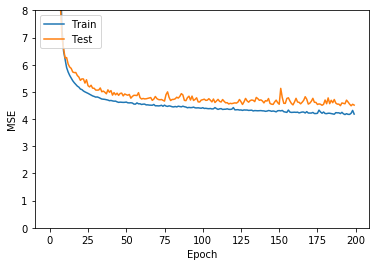

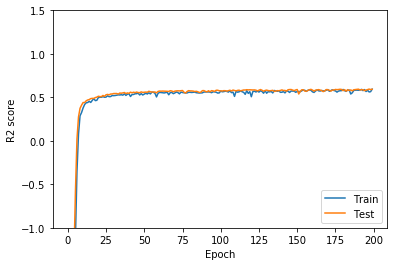

In [171]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

## 0

In [187]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [188]:
model = Sequential()
model.add(Dense(16, input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [189]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [190]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_95 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 33        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [191]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 291us/sample - loss: 97.1335 - mae: 9.3462 - coeff: -8.8396 - val_loss: 88.6052 - val_mae: 8.8383 - val_coeff: -7.2466
Epoch 2/100
3341/3341 [==============================] - 0s 44us/sample - loss: 72.2302 - mae: 7.8750 - coeff: -6.3327 - val_loss: 62.0786 - val_mae: 7.1115 - val_coeff: -4.7788
Epoch 3/100
3341/3341 [==============================] - 0s 53us/sample - loss: 47.9453 - mae: 5.9960 - coeff: -3.9670 - val_loss: 41.4533 - val_mae: 5.3745 - val_coeff: -2.8407
Epoch 4/100
3341/3341 [==============================] - 0s 57us/sample - loss: 34.4524 - mae: 4.8265 - coeff: -2.6130 - val_loss: 32.2135 - val_mae: 4.6291 - val_coeff: -1.9704
Epoch 5/100
3341/3341 [==============================] - 0s 54us/sample - loss: 27.1550 - mae: 4.2075 - coeff: -1.7292 - val_loss: 24.7237 - val_mae: 3.9881 - val_coeff: -1.2798
Epoch 6/100
3341/3341 [==============================] - 0s 63

3341/3341 [==============================] - 0s 74us/sample - loss: 4.7001 - mae: 1.5766 - coeff: 0.5320 - val_loss: 4.9689 - val_mae: 1.5635 - val_coeff: 0.5522
Epoch 48/100
3341/3341 [==============================] - 0s 58us/sample - loss: 4.6449 - mae: 1.5551 - coeff: 0.5146 - val_loss: 4.9863 - val_mae: 1.5597 - val_coeff: 0.5506
Epoch 49/100
3341/3341 [==============================] - 0s 72us/sample - loss: 4.6276 - mae: 1.5379 - coeff: 0.5360 - val_loss: 4.8727 - val_mae: 1.5580 - val_coeff: 0.5603
Epoch 50/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.6093 - mae: 1.5436 - coeff: 0.5434 - val_loss: 4.9205 - val_mae: 1.5557 - val_coeff: 0.5564
Epoch 51/100
3341/3341 [==============================] - 0s 70us/sample - loss: 4.6125 - mae: 1.5457 - coeff: 0.5400 - val_loss: 4.8652 - val_mae: 1.5546 - val_coeff: 0.5611
Epoch 52/100
3341/3341 [==============================] - 0s 79us/sample - loss: 4.5937 - mae: 1.5423 - coeff: 0.5393 - val_loss: 4.9095 -

Epoch 94/100
3341/3341 [==============================] - 0s 55us/sample - loss: 4.3867 - mae: 1.5026 - coeff: 0.5585 - val_loss: 4.7545 - val_mae: 1.5316 - val_coeff: 0.5705
Epoch 95/100
3341/3341 [==============================] - 0s 61us/sample - loss: 4.3769 - mae: 1.5056 - coeff: 0.5631 - val_loss: 4.8028 - val_mae: 1.5284 - val_coeff: 0.5665
Epoch 96/100
3341/3341 [==============================] - 0s 74us/sample - loss: 4.3656 - mae: 1.5013 - coeff: 0.5633 - val_loss: 4.6706 - val_mae: 1.5192 - val_coeff: 0.5778
Epoch 97/100
3341/3341 [==============================] - 0s 73us/sample - loss: 4.3600 - mae: 1.5058 - coeff: 0.5532 - val_loss: 4.7216 - val_mae: 1.5203 - val_coeff: 0.5732
Epoch 98/100
3341/3341 [==============================] - 0s 86us/sample - loss: 4.3655 - mae: 1.5033 - coeff: 0.5695 - val_loss: 4.6478 - val_mae: 1.5160 - val_coeff: 0.5798
Epoch 99/100
3341/3341 [==============================] - 0s 79us/sample - loss: 4.3487 - mae: 1.4941 - coeff: 0.5668 - val_l

In [192]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [193]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.623932681368686
RMSE :      2.150333155901356
r2_score :  0.5879456310431799


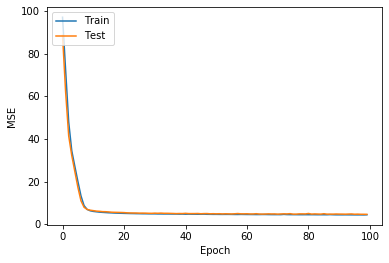

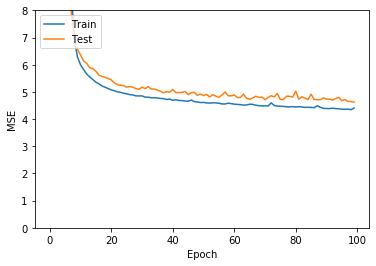

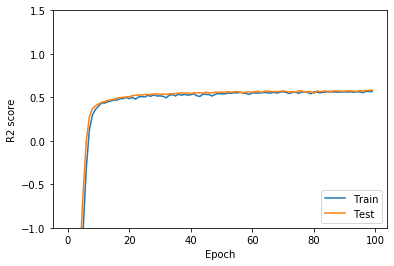

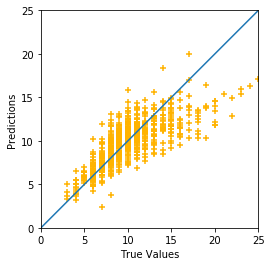

In [204]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# ---------------------------------------- #

## Model 2 : increase param

In [35]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

In [38]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 322us/sample - loss: 36.0191 - mae: 4.1803 - val_loss: 13.8713 - val_mae: 2.7852
Epoch 2/100
3341/3341 [==============================] - 0s 118us/sample - loss: 10.3085 - mae: 2.3524 - val_loss: 7.3094 - val_mae: 1.8315
Epoch 3/100
3341/3341 [==============================] - 0s 113us/sample - loss: 5.6558 - mae: 1.6532 - val_loss: 5.2214 - val_mae: 1.6181
Epoch 4/100
3341/3341 [==============================] - 0s 107us/sample - loss: 4.9008 - mae: 1.5597 - val_loss: 4.8598 - val_mae: 1.6068
Epoch 5/100
3341/3341 [==============================] - 0s 104us/sample - loss: 4.7160 - mae: 1.5328 - val_loss: 4.9665 - val_mae: 1.5705
Epoch 6/100
3341/3341 [==============================] - 0s 105us/sample - loss: 4.5345 - mae: 1.5069 - val_loss: 5.0144 - val_mae: 1.5710
Epoch 7/100
3341/3341 [==============================] - 0s 108us/sample - loss: 4.4446 - mae: 1.4976 - val_loss: 4.

In [43]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [44]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [45]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.911814879162252
RMSE :      2.4314223983426353
r2_score :  0.4731780678299823


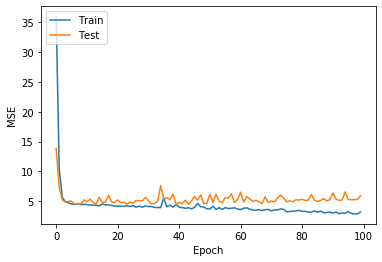

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 3 - 300 epochs

In [51]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [52]:
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # add r2 score

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [54]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 348us/sample - loss: 34.6516 - mae: 4.4401 - val_loss: 9.3450 - val_mae: 2.5321
Epoch 2/300
3341/3341 [==============================] - 0s 109us/sample - loss: 9.2626 - mae: 2.1760 - val_loss: 6.9326 - val_mae: 1.7925
Epoch 3/300
3341/3341 [==============================] - 0s 114us/sample - loss: 5.6155 - mae: 1.6605 - val_loss: 5.4734 - val_mae: 1.6324
Epoch 4/300
3341/3341 [==============================] - 0s 112us/sample - loss: 4.8678 - mae: 1.5712 - val_loss: 5.4711 - val_mae: 1.8502
Epoch 5/300
3341/3341 [==============================] - 0s 112us/sample - loss: 5.4597 - mae: 1.6970 - val_loss: 5.2692 - val_mae: 1.8071
Epoch 6/300
3341/3341 [==============================] - 0s 111us/sample - loss: 4.6592 - mae: 1.5347 - val_loss: 4.8180 - val_mae: 1.5304
Epoch 7/300
3341/3341 [==============================] - 0s 107us/sample - loss: 4.4081 - mae: 1.4933 - val_loss: 4.45

3341/3341 [==============================] - 0s 108us/sample - loss: 2.4079 - mae: 1.1360 - val_loss: 6.2087 - val_mae: 1.6427
Epoch 118/300
3341/3341 [==============================] - 0s 109us/sample - loss: 2.4150 - mae: 1.1374 - val_loss: 6.3288 - val_mae: 1.6966
Epoch 119/300
3341/3341 [==============================] - 0s 109us/sample - loss: 2.4960 - mae: 1.1517 - val_loss: 5.4870 - val_mae: 1.6250
Epoch 120/300
3341/3341 [==============================] - 0s 108us/sample - loss: 2.3437 - mae: 1.1322 - val_loss: 6.2515 - val_mae: 1.6934
Epoch 121/300
3341/3341 [==============================] - 0s 111us/sample - loss: 2.4062 - mae: 1.1428 - val_loss: 5.5344 - val_mae: 1.6273
Epoch 122/300
3341/3341 [==============================] - 0s 118us/sample - loss: 2.3708 - mae: 1.1307 - val_loss: 6.3391 - val_mae: 1.6804
Epoch 123/300
3341/3341 [==============================] - 0s 106us/sample - loss: 2.2650 - mae: 1.0976 - val_loss: 5.8932 - val_mae: 1.6808
Epoch 124/300
3341/3341 [==

3341/3341 [==============================] - 0s 121us/sample - loss: 0.4617 - mae: 0.4812 - val_loss: 7.1128 - val_mae: 1.8462
Epoch 234/300
3341/3341 [==============================] - 0s 110us/sample - loss: 0.4886 - mae: 0.4923 - val_loss: 7.0826 - val_mae: 1.8672
Epoch 235/300
3341/3341 [==============================] - 0s 111us/sample - loss: 0.5953 - mae: 0.5537 - val_loss: 7.0902 - val_mae: 1.8409
Epoch 236/300
3341/3341 [==============================] - 0s 110us/sample - loss: 0.6535 - mae: 0.5663 - val_loss: 7.1957 - val_mae: 1.8625
Epoch 237/300
3341/3341 [==============================] - 0s 113us/sample - loss: 0.5813 - mae: 0.5409 - val_loss: 6.9408 - val_mae: 1.8159
Epoch 238/300
3341/3341 [==============================] - 0s 118us/sample - loss: 0.4873 - mae: 0.4911 - val_loss: 6.8395 - val_mae: 1.8316
Epoch 239/300
3341/3341 [==============================] - 0s 118us/sample - loss: 0.5277 - mae: 0.5019 - val_loss: 6.9829 - val_mae: 1.8225
Epoch 240/300
3341/3341 [==

Epoch 291/300
3341/3341 [==============================] - 0s 124us/sample - loss: 0.3520 - mae: 0.4065 - val_loss: 6.7495 - val_mae: 1.8145
Epoch 292/300
3341/3341 [==============================] - 0s 109us/sample - loss: 0.3101 - mae: 0.3756 - val_loss: 6.9600 - val_mae: 1.8350
Epoch 293/300
3341/3341 [==============================] - 0s 107us/sample - loss: 0.3340 - mae: 0.4108 - val_loss: 6.8335 - val_mae: 1.8403
Epoch 294/300
3341/3341 [==============================] - 0s 123us/sample - loss: 0.4200 - mae: 0.4603 - val_loss: 7.1052 - val_mae: 1.8511
Epoch 295/300
3341/3341 [==============================] - 0s 109us/sample - loss: 0.3319 - mae: 0.4085 - val_loss: 6.6511 - val_mae: 1.8025
Epoch 296/300
3341/3341 [==============================] - 0s 120us/sample - loss: 0.2675 - mae: 0.3461 - val_loss: 6.7785 - val_mae: 1.8137
Epoch 297/300
3341/3341 [==============================] - 0s 120us/sample - loss: 0.2697 - mae: 0.3476 - val_loss: 6.5526 - val_mae: 1.7880
Epoch 298/300

In [55]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [56]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [57]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       6.5180154745720404
RMSE :      2.553040437316268
r2_score :  0.4191574708586415


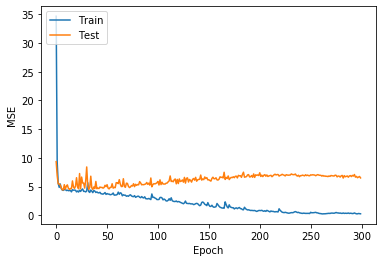

In [58]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 4 add dropout

In [59]:
from tensorflow.keras.layers import Dropout

In [60]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

In [61]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               5632      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)              

In [63]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 471us/sample - loss: 31.2915 - mae: 4.1973 - val_loss: 10.8233 - val_mae: 2.5106
Epoch 2/100
3341/3341 [==============================] - 0s 120us/sample - loss: 10.1721 - mae: 2.2034 - val_loss: 6.0666 - val_mae: 1.7604
Epoch 3/100
3341/3341 [==============================] - 0s 118us/sample - loss: 7.4122 - mae: 1.9098 - val_loss: 5.7137 - val_mae: 1.6450
Epoch 4/100
3341/3341 [==============================] - 0s 117us/sample - loss: 6.8178 - mae: 1.9069 - val_loss: 5.3400 - val_mae: 1.6101
Epoch 5/100
3341/3341 [==============================] - 0s 127us/sample - loss: 6.6749 - mae: 1.8822 - val_loss: 11.4119 - val_mae: 2.5334
Epoch 6/100
3341/3341 [==============================] - 0s 132us/sample - loss: 6.4747 - mae: 1.8517 - val_loss: 5.9475 - val_mae: 1.6865
Epoch 7/100
3341/3341 [==============================] - 0s 120us/sample - loss: 5.9954 - mae: 1.7739 - val_loss: 9

Epoch 59/100
3341/3341 [==============================] - 0s 134us/sample - loss: 4.3876 - mae: 1.5206 - val_loss: 5.5786 - val_mae: 1.5757
Epoch 60/100
3341/3341 [==============================] - 0s 125us/sample - loss: 4.2969 - mae: 1.4861 - val_loss: 5.9588 - val_mae: 1.6309
Epoch 61/100
3341/3341 [==============================] - 0s 120us/sample - loss: 4.4520 - mae: 1.5014 - val_loss: 4.7074 - val_mae: 1.4967
Epoch 62/100
3341/3341 [==============================] - 0s 120us/sample - loss: 4.4364 - mae: 1.5122 - val_loss: 5.0121 - val_mae: 1.6844
Epoch 63/100
3341/3341 [==============================] - 0s 119us/sample - loss: 4.5333 - mae: 1.5452 - val_loss: 5.1627 - val_mae: 1.5102
Epoch 64/100
3341/3341 [==============================] - 0s 116us/sample - loss: 4.3016 - mae: 1.4840 - val_loss: 4.8028 - val_mae: 1.5006
Epoch 65/100
3341/3341 [==============================] - 0s 113us/sample - loss: 4.3737 - mae: 1.5187 - val_loss: 4.6438 - val_mae: 1.4948
Epoch 66/100
3341/33

In [64]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [65]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [66]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.782469774342284
RMSE :      2.1868858622119
r2_score :  0.5738178514445054


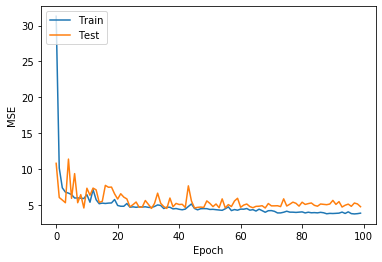

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 4-2 add dropout 300 epochs

In [73]:
from tensorflow.keras.layers import Dropout

In [74]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

In [75]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [76]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               5632      
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)              

In [77]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 403us/sample - loss: 34.4216 - mae: 4.2467 - val_loss: 13.4979 - val_mae: 2.8623
Epoch 2/300
3341/3341 [==============================] - 0s 114us/sample - loss: 9.6402 - mae: 2.1466 - val_loss: 12.1694 - val_mae: 2.6423
Epoch 3/300
3341/3341 [==============================] - 0s 114us/sample - loss: 8.0692 - mae: 1.9733 - val_loss: 5.0934 - val_mae: 1.6553
Epoch 4/300
3341/3341 [==============================] - 0s 119us/sample - loss: 7.3156 - mae: 1.9613 - val_loss: 5.5517 - val_mae: 1.6208
Epoch 5/300
3341/3341 [==============================] - 0s 117us/sample - loss: 6.4406 - mae: 1.8336 - val_loss: 4.8456 - val_mae: 1.5587
Epoch 6/300
3341/3341 [==============================] - 0s 128us/sample - loss: 6.4922 - mae: 1.8515 - val_loss: 5.8906 - val_mae: 1.6574
Epoch 7/300
3341/3341 [==============================] - 0s 114us/sample - loss: 6.1548 - mae: 1.8127 - val_loss: 6.

Epoch 59/300
3341/3341 [==============================] - 0s 115us/sample - loss: 4.5965 - mae: 1.5491 - val_loss: 4.8351 - val_mae: 1.4942
Epoch 60/300
3341/3341 [==============================] - 0s 127us/sample - loss: 4.3946 - mae: 1.5161 - val_loss: 4.5583 - val_mae: 1.4861
Epoch 61/300
3341/3341 [==============================] - 0s 122us/sample - loss: 4.5187 - mae: 1.5400 - val_loss: 4.9047 - val_mae: 1.5321
Epoch 62/300
3341/3341 [==============================] - 0s 114us/sample - loss: 4.4852 - mae: 1.5242 - val_loss: 5.0018 - val_mae: 1.5056
Epoch 63/300
3341/3341 [==============================] - 0s 121us/sample - loss: 4.2047 - mae: 1.4742 - val_loss: 5.6099 - val_mae: 1.5505
Epoch 64/300
3341/3341 [==============================] - 0s 117us/sample - loss: 4.4320 - mae: 1.5021 - val_loss: 4.7670 - val_mae: 1.4853
Epoch 65/300
3341/3341 [==============================] - 0s 113us/sample - loss: 4.1961 - mae: 1.4744 - val_loss: 4.9461 - val_mae: 1.5011
Epoch 66/300
3341/33

3341/3341 [==============================] - 0s 129us/sample - loss: 3.1466 - mae: 1.3036 - val_loss: 5.1213 - val_mae: 1.5401
Epoch 176/300
3341/3341 [==============================] - 0s 116us/sample - loss: 3.1465 - mae: 1.2936 - val_loss: 5.1945 - val_mae: 1.5399
Epoch 177/300
3341/3341 [==============================] - 0s 113us/sample - loss: 3.0912 - mae: 1.2779 - val_loss: 5.4068 - val_mae: 1.5970
Epoch 178/300
3341/3341 [==============================] - 0s 115us/sample - loss: 3.1717 - mae: 1.3028 - val_loss: 5.3136 - val_mae: 1.5536
Epoch 179/300
3341/3341 [==============================] - 0s 137us/sample - loss: 3.0470 - mae: 1.2812 - val_loss: 4.9332 - val_mae: 1.5256
Epoch 180/300
3341/3341 [==============================] - 0s 127us/sample - loss: 3.0180 - mae: 1.2755 - val_loss: 5.4095 - val_mae: 1.5706
Epoch 181/300
3341/3341 [==============================] - 0s 127us/sample - loss: 3.0131 - mae: 1.2766 - val_loss: 5.1569 - val_mae: 1.5443
Epoch 182/300
3341/3341 [==

3341/3341 [==============================] - 0s 118us/sample - loss: 3.1478 - mae: 1.2847 - val_loss: 5.5329 - val_mae: 1.5855
Epoch 292/300
3341/3341 [==============================] - 1s 159us/sample - loss: 2.6877 - mae: 1.1966 - val_loss: 5.5742 - val_mae: 1.5993
Epoch 293/300
3341/3341 [==============================] - 0s 143us/sample - loss: 2.5764 - mae: 1.1714 - val_loss: 5.3326 - val_mae: 1.5835
Epoch 294/300
3341/3341 [==============================] - 1s 154us/sample - loss: 2.3941 - mae: 1.1420 - val_loss: 5.4713 - val_mae: 1.6067
Epoch 295/300
3341/3341 [==============================] - 0s 138us/sample - loss: 2.6604 - mae: 1.1928 - val_loss: 5.6580 - val_mae: 1.6272
Epoch 296/300
3341/3341 [==============================] - 0s 129us/sample - loss: 2.5944 - mae: 1.1885 - val_loss: 5.6992 - val_mae: 1.5995
Epoch 297/300
3341/3341 [==============================] - 0s 124us/sample - loss: 2.3102 - mae: 1.1234 - val_loss: 5.7340 - val_mae: 1.6080
Epoch 298/300
3341/3341 [==

In [78]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [79]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [80]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.931274548022658
RMSE :      2.4354208153874883
r2_score :  0.47144395054823807


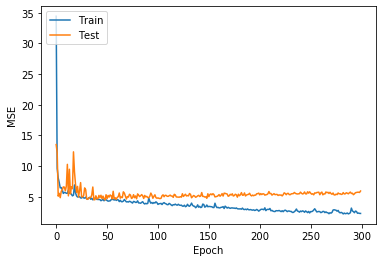

In [81]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## mode 5 dropout + l2 regularization

In [83]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [85]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(1))

In [86]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [87]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               5632      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 512)             

In [88]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 547us/sample - loss: 55.2057 - mae: 4.1723 - val_loss: 31.7916 - val_mae: 2.4782
Epoch 2/100
3341/3341 [==============================] - 1s 153us/sample - loss: 29.0373 - mae: 2.0741 - val_loss: 30.1679 - val_mae: 2.6792
Epoch 3/100
3341/3341 [==============================] - 0s 149us/sample - loss: 25.5827 - mae: 2.1442 - val_loss: 28.7546 - val_mae: 2.8032
Epoch 4/100
3341/3341 [==============================] - 1s 151us/sample - loss: 22.3155 - mae: 1.9784 - val_loss: 24.6804 - val_mae: 2.4085
Epoch 5/100
3341/3341 [==============================] - 1s 154us/sample - loss: 20.2205 - mae: 1.8736 - val_loss: 19.7172 - val_mae: 1.8124
Epoch 6/100
3341/3341 [==============================] - 0s 149us/sample - loss: 18.7104 - mae: 1.8210 - val_loss: 18.6935 - val_mae: 1.7766
Epoch 7/100
3341/3341 [==============================] - 1s 151us/sample - loss: 17.6747 - mae: 1.8034 - va

Epoch 59/100
3341/3341 [==============================] - 0s 146us/sample - loss: 5.8859 - mae: 1.5214 - val_loss: 6.3191 - val_mae: 1.5113
Epoch 60/100
3341/3341 [==============================] - 1s 160us/sample - loss: 5.9434 - mae: 1.5446 - val_loss: 5.7653 - val_mae: 1.4710
Epoch 61/100
3341/3341 [==============================] - 0s 144us/sample - loss: 5.6343 - mae: 1.4993 - val_loss: 6.1691 - val_mae: 1.4934
Epoch 62/100
3341/3341 [==============================] - 1s 161us/sample - loss: 5.8576 - mae: 1.5622 - val_loss: 5.8557 - val_mae: 1.4983
Epoch 63/100
3341/3341 [==============================] - 1s 151us/sample - loss: 5.6695 - mae: 1.5280 - val_loss: 6.8696 - val_mae: 1.5830
Epoch 64/100
3341/3341 [==============================] - 1s 150us/sample - loss: 5.6532 - mae: 1.5289 - val_loss: 5.7724 - val_mae: 1.4733
Epoch 65/100
3341/3341 [==============================] - 0s 149us/sample - loss: 5.6032 - mae: 1.5250 - val_loss: 5.7470 - val_mae: 1.5185
Epoch 66/100
3341/33

In [89]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [90]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [91]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.877399070929311
RMSE :      2.2084834323420472
r2_score :  0.5653583789356833


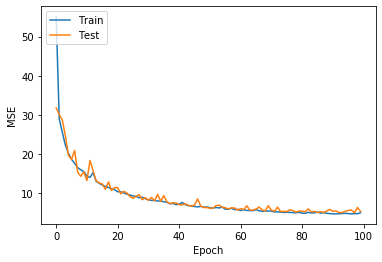

In [92]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## mode 5 dropout + l2 regularization 300 epochs

In [93]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [94]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(1))

In [95]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [96]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               5632      
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 512)             

In [97]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 3s 900us/sample - loss: 63.7974 - mae: 4.9044 - val_loss: 38.7919 - val_mae: 3.1723
Epoch 2/300
3341/3341 [==============================] - 1s 173us/sample - loss: 29.8866 - mae: 2.2007 - val_loss: 28.9729 - val_mae: 2.4121
Epoch 3/300
3341/3341 [==============================] - 1s 161us/sample - loss: 25.0999 - mae: 2.0788 - val_loss: 21.0268 - val_mae: 1.6644
Epoch 4/300
3341/3341 [==============================] - 1s 181us/sample - loss: 22.5581 - mae: 1.9679 - val_loss: 20.1104 - val_mae: 1.6971
Epoch 5/300
3341/3341 [==============================] - 1s 176us/sample - loss: 19.9949 - mae: 1.8450 - val_loss: 18.5444 - val_mae: 1.6245
Epoch 6/300
3341/3341 [==============================] - 1s 167us/sample - loss: 18.9299 - mae: 1.8336 - val_loss: 16.8477 - val_mae: 1.5499
Epoch 7/300
3341/3341 [==============================] - 1s 159us/sample - loss: 17.4119 - mae: 1.7471 - va

Epoch 59/300
3341/3341 [==============================] - 1s 175us/sample - loss: 6.0230 - mae: 1.5308 - val_loss: 6.5402 - val_mae: 1.5346
Epoch 60/300
3341/3341 [==============================] - 1s 182us/sample - loss: 6.1037 - mae: 1.5376 - val_loss: 6.1108 - val_mae: 1.5830
Epoch 61/300
3341/3341 [==============================] - 1s 184us/sample - loss: 6.0948 - mae: 1.5798 - val_loss: 6.3361 - val_mae: 1.4938
Epoch 62/300
3341/3341 [==============================] - 1s 155us/sample - loss: 5.8432 - mae: 1.5309 - val_loss: 6.6835 - val_mae: 1.5383
Epoch 63/300
3341/3341 [==============================] - 1s 159us/sample - loss: 5.9334 - mae: 1.5286 - val_loss: 5.9033 - val_mae: 1.4674
Epoch 64/300
3341/3341 [==============================] - 1s 154us/sample - loss: 5.6795 - mae: 1.4963 - val_loss: 6.0877 - val_mae: 1.4808
Epoch 65/300
3341/3341 [==============================] - 1s 156us/sample - loss: 5.6556 - mae: 1.5117 - val_loss: 6.7495 - val_mae: 1.5623
Epoch 66/300
3341/33

3341/3341 [==============================] - 1s 166us/sample - loss: 4.2319 - mae: 1.4013 - val_loss: 5.0702 - val_mae: 1.4841
Epoch 176/300
3341/3341 [==============================] - 1s 165us/sample - loss: 4.3129 - mae: 1.4352 - val_loss: 5.2729 - val_mae: 1.4938
Epoch 177/300
3341/3341 [==============================] - 1s 171us/sample - loss: 4.2607 - mae: 1.4137 - val_loss: 5.8993 - val_mae: 1.5597
Epoch 178/300
3341/3341 [==============================] - 1s 163us/sample - loss: 4.2474 - mae: 1.4112 - val_loss: 5.9277 - val_mae: 1.5730
Epoch 179/300
3341/3341 [==============================] - 1s 170us/sample - loss: 4.2039 - mae: 1.4019 - val_loss: 5.3610 - val_mae: 1.5096
Epoch 180/300
3341/3341 [==============================] - 1s 172us/sample - loss: 4.2904 - mae: 1.4244 - val_loss: 5.2547 - val_mae: 1.5285
Epoch 181/300
3341/3341 [==============================] - 1s 161us/sample - loss: 4.4005 - mae: 1.4488 - val_loss: 5.4219 - val_mae: 1.4986
Epoch 182/300
3341/3341 [==

3341/3341 [==============================] - 1s 162us/sample - loss: 3.8805 - mae: 1.3214 - val_loss: 5.5575 - val_mae: 1.5082
Epoch 292/300
3341/3341 [==============================] - 1s 158us/sample - loss: 4.2461 - mae: 1.3880 - val_loss: 5.5211 - val_mae: 1.5001
Epoch 293/300
3341/3341 [==============================] - 1s 161us/sample - loss: 3.8694 - mae: 1.3440 - val_loss: 5.5376 - val_mae: 1.5003
Epoch 294/300
3341/3341 [==============================] - 1s 153us/sample - loss: 3.8935 - mae: 1.3372 - val_loss: 5.7309 - val_mae: 1.5156
Epoch 295/300
3341/3341 [==============================] - 1s 156us/sample - loss: 3.9418 - mae: 1.3492 - val_loss: 5.7710 - val_mae: 1.5178
Epoch 296/300
3341/3341 [==============================] - 1s 151us/sample - loss: 3.7868 - mae: 1.3121 - val_loss: 6.0385 - val_mae: 1.5548
Epoch 297/300
3341/3341 [==============================] - 1s 163us/sample - loss: 3.7700 - mae: 1.3156 - val_loss: 5.7067 - val_mae: 1.5183
Epoch 298/300
3341/3341 [==

In [98]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [99]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [100]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.152491915142228
RMSE :      2.2699101116877354
r2_score :  0.5408439198944808


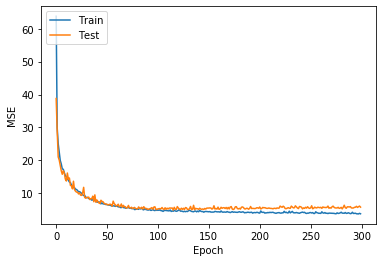

In [101]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()